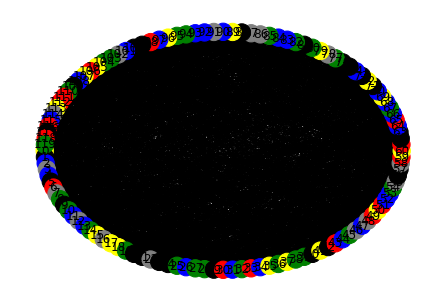

In [13]:
import networkx as nx
import random
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# define colors for compartments
compartment_color = {
    'S': 'blue',
    'E': 'yellow',
    'I': 'red',
    'R': 'green',
    'M': 'black',
    'Z': 'gray'
}

# define compartments
compartments = ['S', 'E', 'I', 'R', 'M', 'Z']
prime = ['S']

n = 120
G = nx.Graph()
for i in range(n):
    G.add_node(i)

# assign at least one node to each compartment
compartment_nodes = {}
for compartment in compartments:
    node = random.choice(list(G.nodes()))
    compartment_nodes[compartment] = node
    G.nodes[node]['compartment'] = compartment

# assign remaining nodes to compartments randomly
for node in G.nodes():
    if 'compartment' not in G.nodes[node]:
        compartment = random.choice(list(compartments))
        G.nodes[node]['compartment'] = compartment

# add edges randomly between nodes
for i in range(n):
    for j in range(i+1, n):
        if random.random() < 0.3:
            G.add_edge(i, j)

# calculate edge weights using jaccard similarity index
for u, v in G.edges():
    compartment1 = G.nodes[u]['compartment']
    compartment2 = G.nodes[v]['compartment']
    if compartment1 == compartment2:
        weight = 0.0
    else:
        neighbors1 = set(G.neighbors(u))
        neighbors2 = set(G.neighbors(v))
        weight = len(neighbors1.intersection(neighbors2)) / len(neighbors1.union(neighbors2))
    G[u][v]['weight'] = weight

# draw graph
pos = nx.shell_layout(G)
node_colors = [compartment_color[G.nodes[node]['compartment']] for node in G.nodes()]
edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
nx.draw(G, pos, node_color=node_colors, with_labels=True)
#nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.5f}' for u, v, d in G.edges(data=True)})

In [14]:
# print edge list with weights
for u, v, w in G.edges(data=True):
    print(f"{u} -- {v} : {w['weight']}")

0 -- 3 : 0.16923076923076924
0 -- 4 : 0.2857142857142857
0 -- 6 : 0.18181818181818182
0 -- 15 : 0.0
0 -- 19 : 0.18518518518518517
0 -- 20 : 0.1746031746031746
0 -- 22 : 0.14285714285714285
0 -- 23 : 0.18032786885245902
0 -- 31 : 0.09375
0 -- 33 : 0.203125
0 -- 38 : 0.1694915254237288
0 -- 40 : 0.1346153846153846
0 -- 42 : 0.14035087719298245
0 -- 47 : 0.24193548387096775
0 -- 50 : 0.0
0 -- 52 : 0.2
0 -- 54 : 0.11320754716981132
0 -- 57 : 0.14516129032258066
0 -- 69 : 0.0
0 -- 70 : 0.19047619047619047
0 -- 75 : 0.21052631578947367
0 -- 76 : 0.23809523809523808
0 -- 88 : 0.17647058823529413
0 -- 93 : 0.15517241379310345
0 -- 98 : 0.1791044776119403
0 -- 100 : 0.13846153846153847
0 -- 104 : 0.125
0 -- 107 : 0.0
0 -- 111 : 0.17857142857142858
0 -- 112 : 0.24528301886792453
0 -- 115 : 0.13793103448275862
0 -- 117 : 0.24
0 -- 119 : 0.21818181818181817
1 -- 6 : 0.18571428571428572
1 -- 9 : 0.0
1 -- 11 : 0.2459016393442623
1 -- 17 : 0.19047619047619047
1 -- 20 : 0.0
1 -- 22 : 0.305084745762711

In [15]:
from tabulate import tabulate
# display adjacency matrix in a table format
adj_mat = nx.to_numpy_matrix(G)
df = pd.DataFrame(adj_mat, index=G.nodes(), columns=G.nodes())
print("Adjacency Matrix:\n")
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

Adjacency Matrix:

╒═════╤══════════╤═══════════╤══════════╤═══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╤══════════╤═══════════╤═══════════╤══════════╤═══════════╤══════════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤═══════════╤═══════════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤══════════╤═══════════╤═══════════╤═══════════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤══════════╤═══════════╤══════════╤══════════╤═══════════╤══════════╤═══════════╤═══════════╤══════════╤══════════╤═══════════╤══════════╤═══════════╤═══════════╤══════════╤══════════╤═══════════╤══════════╤═══════════╤═══════════╤═══════════╤══════════╤══════════╤═══════════╤══════════

In [16]:
# display compartment info in a table format
compartment_info = {}
for node in G.nodes():
    compartment = G.nodes[node]['compartment']
    if compartment not in compartment_info:
        compartment_info[compartment] = []
    compartment_info[compartment].append(node)

compartment_lengths = [len(v) for v in compartment_info.values()]
max_compartment_length = max(compartment_lengths)

for compartment in compartment_info:
    while len(compartment_info[compartment]) < max_compartment_length:
        compartment_info[compartment].append('')
        
df = pd.DataFrame(compartment_info)
df.index.name = 'Compartment'
print("\nCompartment Info:\n")
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))


Compartment Info:

╒═════╤═════╤═════╤═════╤═════╤═════╕
│ E   │ M   │   S │ Z   │ I   │ R   │
╞═════╪═════╪═════╪═════╪═════╪═════╡
│ 0   │ 1   │   2 │ 3   │ 6   │ 8   │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 15  │ 5   │   4 │ 7   │ 30  │ 10  │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 17  │ 9   │  11 │ 12  │ 33  │ 14  │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 18  │ 20  │  13 │ 16  │ 43  │ 19  │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 35  │ 21  │  26 │ 22  │ 49  │ 25  │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 37  │ 23  │  31 │ 46  │ 51  │ 27  │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 41  │ 24  │  34 │ 48  │ 59  │ 28  │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 50  │ 29  │  44 │ 55  │ 61  │ 32  │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 60  │ 40  │  47 │ 58  │ 65  │ 36  │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 69  │ 42  │  52 │ 78  │ 98  │ 38  │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 72  │ 56  │  53 │ 86  │ 106 │ 39  │
├─────┼─────┼─────┼─────┼─────┼─────┤
│ 79  │ 57  │  64 │ 87  │ 111 

In [17]:
max_degree_node, max_degree = max(G.degree(), key=lambda x: x[1])
compartment = G.nodes[max_degree_node]['compartment']
print(f"The node with maximum degree is {max_degree_node} with degree {max_degree}, and it belongs to compartment {compartment}.")

The node with maximum degree is 103 with degree 49, and it belongs to compartment R.


In [18]:
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
compartment = G.nodes[max_betweenness_node]['compartment']
print(f"The node with maximum betweenness centrality is {max_betweenness_node} with centrality {betweenness_centrality[max_betweenness_node]}, and it belongs to compartment {compartment}.")

The node with maximum betweenness centrality is 103 with centrality 0.01111275077502441, and it belongs to compartment R.


In [19]:
def deriv_seirmz(y, t, N, alpha, beta, gamma, delta, a, c, d, f, g, b, c1, c2, c3, c4, c5, c6, epsilon):
    S, E, I, R, M, Z = y
    dSdt = -(alpha * S * E) - (alpha * I * S) + ((c1 - c2) * epsilon)
    dEdt = (alpha * S * E) + (alpha * I * S) - (a * E) - (b * delta * E) - (c * E) - (c3 * epsilon)
    dIdt = (a * E - beta * I) - (b * gamma * I) - (d * I) + (f * Z)  - (c4 * epsilon)
    dRdt = (beta * I) + (g * Z) - (c5 * epsilon)
    dMdt = (delta * b * E) + (gamma * b * I)
    dZdt = (c * E) + (d * I) - (f * Z) - (g * Z) - (c6 * epsilon)
    return dSdt, dEdt, dIdt, dRdt, dMdt, dZdt

In [20]:
from collections import Counter

# Create a list of compartment labels for all nodes in the graph
compartment_labels = [G.nodes[node]['compartment'] for node in G.nodes()]

# Count the number of nodes in each compartment
node_counts = Counter(compartment_labels)

# Print the node counts for each compartment
for compartment in compartments:
    count = node_counts[compartment]
    print(f"Number of nodes in compartment {compartment}: {count}")

Number of nodes in compartment S: 25
Number of nodes in compartment E: 17
Number of nodes in compartment I: 15
Number of nodes in compartment R: 24
Number of nodes in compartment M: 24
Number of nodes in compartment Z: 15


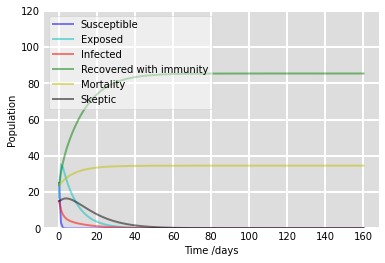

<Figure size 432x216 with 0 Axes>

In [21]:
S0 = node_counts['S']
E0 = node_counts['E']
I0 = node_counts['I']
R0 = node_counts['R']
M0 = node_counts['M']
Z0 = node_counts['Z']
alpha, beta, gamma, delta = 0.05, 0.5, 0.05, 0.05 
a,c,d,f,g = 0.05, 0.05, 0.05, 0.05 , 0.05
#bias and population changes
c1, c2, c3, c4, c5, c6 = 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001
b=0.5
epsilon = n/100
# A grid of time points (in days)
t = np.linspace(0, 160, 160)
# Initial conditions vector
y0 = S0, E0, I0, R0, M0, Z0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_seirmz, y0, t, args=(n, alpha, beta, gamma, delta, a, c, d, f, g, b, c1, c2, c3, c4, c5, c6, epsilon))
S, E, I, R, M, Z = ret.T

# Plot the data on four separate curves for S(t), I(t), R(t) and M(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E, 'c', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, M, 'y', alpha=0.5, lw=2, label='Mortality')
ax.plot(t, Z, 'k', alpha=0.5, lw=2, label='Skeptic')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,n)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
plt.gcf().set_size_inches(6,3)

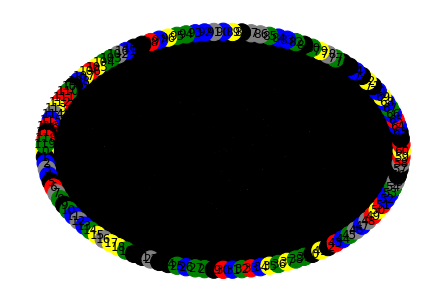

In [22]:
new_nodes_to_add = 0
if(Z0 < I0):
    new_nodes_to_add = node_counts['I'] - node_counts['Z'] + new_nodes_to_add
n = n + new_nodes_to_add

def add_nodes_to_Z(G, new_nodes_to_add):
    # Get all nodes in Z compartment
    Z_nodes = [n for n, d in G.nodes(data=True) if d['compartment'] == 'Z']
    # Add new nodes to Z compartment
    new_nodes = []
    for i in range(new_nodes_to_add):
        new_node = max(G.nodes()) + 1
        G.add_node(new_node, compartment='Z')
        new_nodes.append(new_node)
        # Connect the new node to a random node in the graph that is not already connected to the new node
    return G

G = add_nodes_to_Z(G,new_nodes_to_add)

# add edges randomly between nodes
for i in range(n):
    for j in range(i+1, n):
        if random.random() < 0.2 and not G.has_edge(i,j):
            G.add_edge(i, j)

# calculate edge weights using jaccard similarity index
for u, v in G.edges():
    compartment1 = G.nodes[u]['compartment']
    compartment2 = G.nodes[v]['compartment']
    if compartment1 == compartment2:
        weight = 0.0
    else:
        neighbors1 = set(G.neighbors(u))
        neighbors2 = set(G.neighbors(v))
        weight = len(neighbors1.intersection(neighbors2)) / len(neighbors1.union(neighbors2))
    G[u][v]['weight'] = weight

# draw graph
pos = nx.shell_layout(G)
node_colors = [compartment_color[G.nodes[node]['compartment']] for node in G.nodes()]
edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
nx.draw(G, pos, node_color=node_colors, with_labels=True)
#nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.5f}' for u, v, d in G.edges(data=True)})
    

In [23]:
from collections import Counter

# Create a list of compartment labels for all nodes in the graph
compartment_labels = [G.nodes[node]['compartment'] for node in G.nodes()]

# Count the number of nodes in each compartment
node_counts = Counter(compartment_labels)

# Print the node counts for each compartment
for compartment in compartments:
    count = node_counts[compartment]
    print(f"Number of nodes in compartment {compartment}: {count}")

Number of nodes in compartment S: 25
Number of nodes in compartment E: 17
Number of nodes in compartment I: 15
Number of nodes in compartment R: 24
Number of nodes in compartment M: 24
Number of nodes in compartment Z: 15


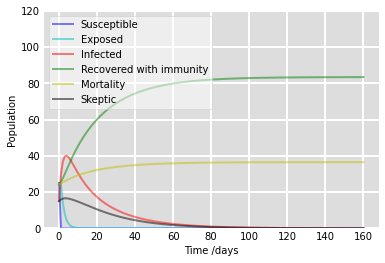

<Figure size 432x216 with 0 Axes>

In [24]:
S0 = node_counts['S']
E0 = node_counts['E']
I0 = node_counts['I']
R0 = node_counts['R']
M0 = node_counts['M']
Z0 = node_counts['Z']
alpha, beta, gamma, delta = 0.5, 0.05, 0.025, 0.025 
a,c,d,f,g = 0.5, 0.05, 0.025, 0.055 , 0.025
#bias and population changes
c1, c2, c3, c4, c5, c6 = 0, 0, 0, 0, 0, 0
b=0.5
epsilon = n/100
# A grid of time points (in days)
t = np.linspace(0, 160, 160)
# Initial conditions vector
y0 = S0, E0, I0, R0, M0, Z0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_seirmz, y0, t, args=(n, alpha, beta, gamma, delta, a, c, d, f, g, b, c1, c2, c3, c4, c5, c6, epsilon))
S, E, I, R, M, Z = ret.T

# Plot the data on four separate curves for S(t), I(t), R(t) and M(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E, 'c', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, M, 'y', alpha=0.5, lw=2, label='Mortality')
ax.plot(t, Z, 'k', alpha=0.5, lw=2, label='Skeptic')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,n)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
plt.gcf().set_size_inches(6,3)